# 회귀 - 보스턴 집값 예측 

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
# import warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size = 0.1, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [5]:
# 모델정의 설정 및 학습 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# del model

In [8]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1)    # 회귀라서 활성화 함수 없어
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 컴파일 # 회귀의 경우에 정확도 없어. metrics 따로 없습니다 # 메트릭스 지정하면 아래 버보스 주절주절 옵션에 나올것이다. 
model.compile(optimizer='adam', loss='mean_squared_error') 

In [18]:
# hist = model.fit(X_train, y_train, epochs=100, batch_size=60, verbose=1) # 기본 버보스가 1인듯
# # 데이터가 한 500건 되니 50으로 한다. 

# hist = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=60)  # 밸리데이션 등 세부옵션 주면 버보스 섦명에 추가로 나와 기본값은 1인듯. 
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=60, verbose=0)

시각화 타임 

In [11]:
# y_loss = hist.history['loss']
# y_vloss = hist.history['val_loss']
# xs = np.arange(1, len(y_loss)+1)

In [33]:
y_loss = hist.history['loss'][5:]
y_vloss = hist.history['val_loss'][5:]
xs = np.arange(6, len(y_loss)+6)

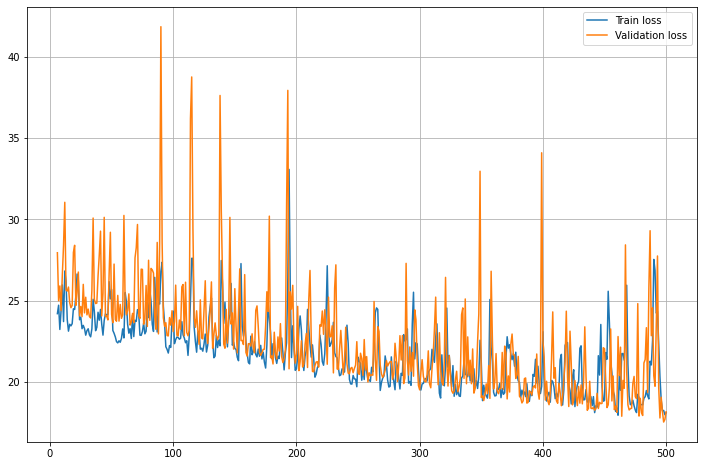

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label="Train loss")
plt.plot(xs, y_vloss, label='Validation loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# plt.figure(figsize=(12,8))
# plt.plot(xs, y_acc, ms=5, label='train accuracy')
# plt.plot(xs, y_vloss, ms=5, label='validation loss')
# plt.legend()
# plt.grid()
# plt.xlabel('Epoch')
# plt.show()

평가 및 예측

In [15]:
# 평가 예측값과 실제값의 비교
model.evaluate(X_test, y_test,verbose=2)

2/2 - 0s - loss: 29.9504 - 16ms/epoch - 8ms/step


29.950382232666016

In [16]:
pred = model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mse, r2

(29.950373969221044, 0.6432135921006688)

예측 값과 실제값의 비교

In [25]:
# 
df = pd.DataFrame({
    'y_test':y_test, 'pred':pred.flatten()
})
df.head(10)
# 1,-1 안되나?

,y_test,pred
0,20.1,21.983509
1,11.9,9.911211
2,20.6,18.760216
3,33.2,32.877945
4,20.8,17.891756
5,13.5,6.994967
6,24.7,24.351927
7,13.9,10.490944
8,10.4,12.877160
9,19.7,12.022337


In [27]:
y_test.shape, pred.shape

((51,), (51, 1))

In [ ]:
# 보스톤 코드 돌릴수 있는 파이썬 파일 만들고 실행 

테스트 프로그램 뭘 추가해야 할까?

In [28]:
index = 30
X_test[index], y_test[index]

(array([1.5876e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01,
        5.9610e+00, 1.7500e+01, 5.2873e+00, 4.0000e+00, 3.0500e+02,
        1.9200e+01, 3.7694e+02, 9.8800e+00]), 21.7)

In [31]:
pred_value = model.predict(X_test[index].reshape(1,-1))  # [21.192657]
pred_value

array([[21.192657]], dtype=float32)

리쉐입의 문제 

In [32]:
print(f'실제값: {y_test[index]}, 예측값 : {pred_value[0,0]:.2f}')

실제값: 21.7, 예측값 : 21.19


In [35]:
model.save('boston.h5')

In [36]:
# 점심 이후 boston2 만들고 시작 

In [40]:
!python boston.py

2022-01-12 04:15:00.466354: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
0 ~ 100 정수값을 입력하세요.> 37
실제값: 27.1, 예측값 : 17.68


In [38]:
!python boston2.py

2022-01-12 04:13:48.023642: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
0 ~ 100 정수값을 입력하세요.> 10
실제값: 21.4, 예측값 : 21.02


In [43]:
!python boston3.py

boston3.py 1
사용법 : python boston3.py test_dataset_index(0~50


In [45]:
!python boston3.py

boston3.py 1
사용법 : python boston3.py test_dataset_index(0~50


In [46]:
!python boston3.py 42

2022-01-12 04:31:56.942359: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
실제값: 20.4, 예측값 : 15.39


In [47]:
!python boston3.py one

정수를 입력하세요
사용법 : python boston3.py test_dataset_index(0~50


In [49]:
!python boston3.py 100

0과 50사이의 정수를 입력하세요
사용법 : python boston3.py test_dataset_index(0~50) 2> /dev/null


In [ ]:
!python boston3.py 3 2> /dev/null

# 리눅스 설명 .
0  stdin
1  stdout  스탠다드 아웃
2  stderr   스탠다드 에러는 디바이스 널로 보내라. 데이타 씽크 쓰레기통. 아무나 데이터를 집어넣어 버려. 

In [51]:
!python boston3.py 33 2> /dev/null
# 에러 메시지 출력되지 않는 코드. 

실제값: 17.5, 예측값 : 16.92
